In [ ]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 19.1 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
# libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
import time

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay


#Neural Network
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Lambda, Layer, ReLU
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D,Concatenate



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
#Metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras.layers import Input
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from keras import optimizers

In [ ]:
import tensorflow
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Dense, Input, Reshape, Lambda, Layer, Flatten, BatchNormalization,AveragePooling2D
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist

from keras import initializers

from keras.utils import to_categorical

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

import math

In [ ]:
Data = pd.read_excel('/content/database_non-shows (2) (3).xlsx')

In [ ]:
Labels = Data['Appointment Type'].values
Features = Data.drop(['Appointment Type'],axis=1).values

In [ ]:
# Calcula el conteo de cada clase en y_train
conteo_clases = np.bincount(Labels)

# Muestra el conteo de cada clase
for clase, conteo in enumerate(conteo_clases):
    print(f"Clase {clase}: {conteo} ejemplos")

Clase 0: 6434 ejemplos
Clase 1: 12153 ejemplos


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size=0.2, stratify=Labels, random_state=42)

print('Train data shape:', X_train.shape)
print('Train labels shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Train data shape: (14869, 12)
Train labels shape: (14869,)
Test data shape: (3718, 12)
Test labels shape: (3718,)


In [ ]:
y_train= tf.keras.utils.to_categorical(
    y_train, num_classes=2
)

In [ ]:
y_test= tf.keras.utils.to_categorical(
    y_test, num_classes=2
)

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(14869, 12)

In [ ]:
X_train=np.expand_dims(X_train, axis=-1)
X_test=np.expand_dims(X_test, axis=-1)

In [ ]:
X_train.shape

(14869, 12, 1)

In [ ]:
#classes
classes = [0, 1]

In [ ]:
def evaluate_model(model, X_test, y_test, history):

    # Realizar predicciones con el modelo
    y_pred = model.predict(X_test)

    # Obtener la clase con la máxima probabilidad en las etiquetas verdaderas (y_test)
    max_prob_true = np.argmax(y_test, axis=1)

    # Obtener la clase con la máxima probabilidad en las predicciones (predict)
    max_prob_pred = np.argmax(y_pred, axis=1)

    # Calcular las métricas
    accuracy = accuracy_score(max_prob_true, max_prob_pred)
    f1 = f1_score(max_prob_true, max_prob_pred)
    recall = recall_score(max_prob_true, max_prob_pred)

    # Mostrar las métricas
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Recall:", recall)

    # Graficar la precisión para entrenamiento y validación
    plt.plot(history.history['accuracy'], label='Train Accuracy')  # Precisión del entrenamiento
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')  # Precisión de la validación
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    # Graficar la pérdida para entrenamiento y validación
    plt.plot(history.history['loss'], label='Train Loss')  # Pérdida del entrenamiento
    plt.plot(history.history['val_loss'], label='Test Loss')  # Pérdida de la validación
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(max_prob_true, max_prob_pred)

    # Graficar la matriz de confusión usando seaborn
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

     # Binarizar las etiquetas verdaderas para ROC multi-clase
    y_test_bin = label_binarize(y_test, classes=np.arange(y_pred.shape[1]))

    # Número de clases
    n_classes = y_pred.shape[1]

    # Inicializar las variables para la curva ROC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Calcular fpr, tpr y AUC para cada clase
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Gráfica ROC para cada clase
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    # Agregar la línea de referencia
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

    # Etiquetas y título del gráfico
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

## Transformer Con Fully: 16:1


In [ ]:

# OPTIMIZER

#Pequeños :3

LEARNING_RATE_2 = 1e-3
WEIGHT_DECAY_2 = 1e-4
LAYER_NORM_EPS_2 = 1e-6


PROJECTION_DIM_2 = 64 # No se puede modificar

#Potencias de 2

NUM_HEADS_2 = 16
NUM_LAYERS_2 = 1

MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
def transformer_2(encoded_patches):

    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)

    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1)

    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)

    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches

def Transform_sh_2(inputs):
      # Iterate over the number of layers and stack up blocks of
      # Transformer.
    for i in range(NUM_LAYERS_2):
          # Add a Transformer block.
        encoded_patches = transformer_2(inputs)

    return encoded_patches

##Relu

In [ ]:
def FullyConnected():

  inputs = Input(shape=(X_train.shape[1],1), name="input_1")

  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(inputs)
  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)
  x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x=  tf.keras.layers.Dropout(rate=0.5)(x)

  x = tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)

  CVT1=Transform_sh_2(x)

  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(CVT1)
  Flat=tf.keras.layers.GlobalMaxPooling1D()(representation)


  # ANN
  x = tf.keras.layers.Dense(512, activation='selu')(Flat)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(256, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(128, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(64, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(32, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(16, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(12, activation='selu')(x)

  outputs = predictions = Dense(len(classes), activation="softmax", name="output_1")(x)
  model = Model(inputs = inputs, outputs = outputs)
  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = FullyConnected()
history = model.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/250
117/117 [==============================] - 15s 20ms/step - loss: 1.2257 - accuracy: 0.5524 - val_loss: 0.6461 - val_accuracy: 0.6538
Epoch 2/250
117/117 [==============================] - 2s 13ms/step - loss: 0.7812 - accuracy: 0.5737 - val_loss: 0.6535 - val_accuracy: 0.6538
Epoch 3/250
117/117 [==============================] - 2s 13ms/step - loss: 0.7072 - accuracy: 0.6013 - val_loss: 0.6446 - val_accuracy: 0.6538
Epoch 4/250
117/117 [==============================] - 2s 14ms/step - loss: 0.6854 - accuracy: 0.6185 - val_loss: 0.6463 - val_accuracy: 0.6538
Epoch 5/250
117/117 [==============================] - 2s 18ms/step - loss: 0.6724 - accuracy: 0.6304 - val_loss: 0.6455 - val_accuracy: 0.6538
Epoch 6/250
117/117 [==============================] - 2s 17ms/step - loss: 0.6665 - accuracy: 0.6388 - val_loss: 0.6457 - val_accuracy: 0.6538
Epoch 7/250
117/117 [==============================] - 2s 13ms/step - loss: 0.6614 - accuracy: 0.6436 - val_loss: 0.6451 - val_accuracy

117/117 [==============================] - 1s 4ms/step
Accuracy: 0.6538461538461539
F1 Score: 0.7906976744186047
Recall: 1.0


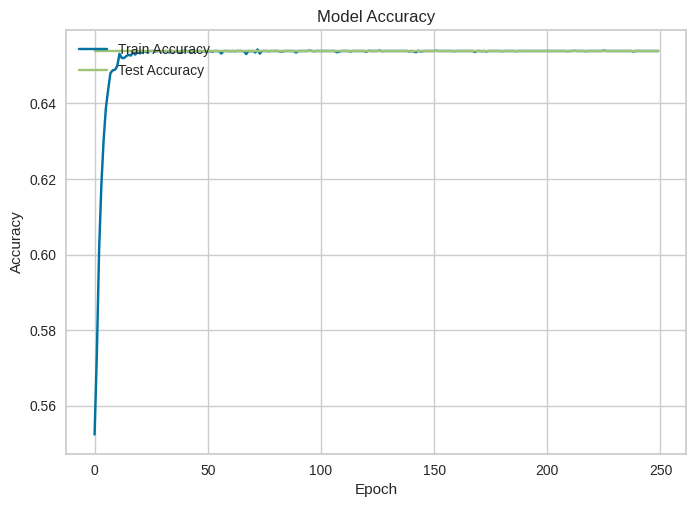

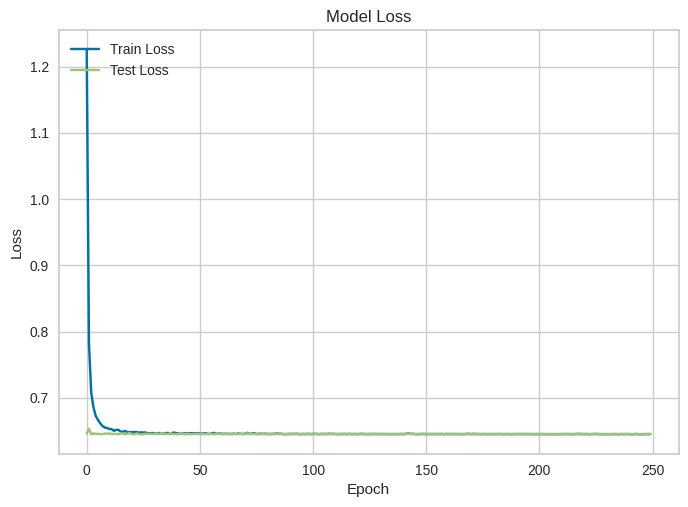

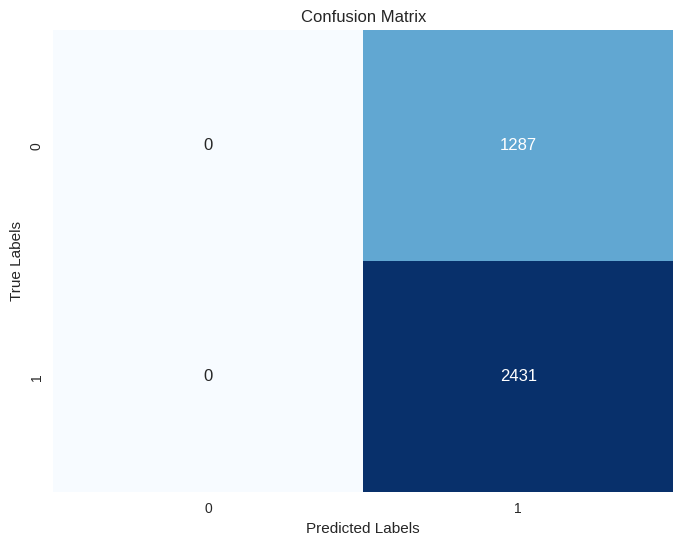

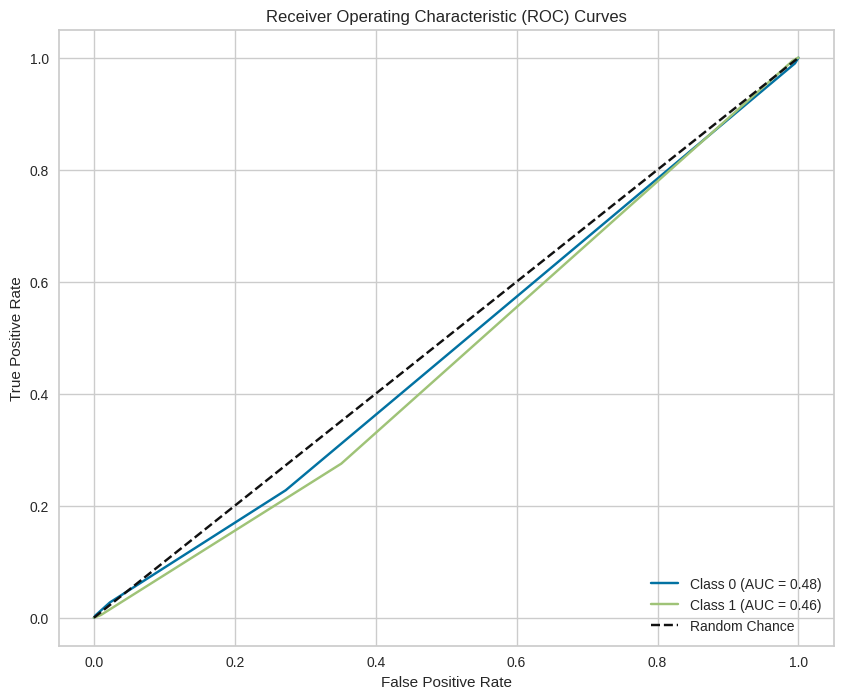

In [ ]:
evaluate_model(model, X_test, y_test, history)

## Transformer 1:1

In [ ]:

# OPTIMIZER

#Pequeños :3

LEARNING_RATE_2 = 1e-3
WEIGHT_DECAY_2 = 1e-4
LAYER_NORM_EPS_2 = 1e-6


PROJECTION_DIM_2 = 64 # No se puede modificar

#Potencias de 2

NUM_HEADS_2 = 1
NUM_LAYERS_2 = 1

MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
def transformer_2(encoded_patches):

    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)

    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1)

    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)

    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches

def Transform_sh_2(inputs):
      # Iterate over the number of layers and stack up blocks of
      # Transformer.
    for i in range(NUM_LAYERS_2):
          # Add a Transformer block.
        encoded_patches = transformer_2(inputs)

    return encoded_patches

In [ ]:
def FullyConnected():

  inputs = Input(shape=(X_train.shape[1],1), name="input_1")

  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(inputs)
  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)
  x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x=  tf.keras.layers.Dropout(rate=0.5)(x)

  x = tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)

  CVT1=Transform_sh_2(x)

  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(CVT1)
  Flat=tf.keras.layers.GlobalMaxPooling1D()(representation)


  # ANN
  x = tf.keras.layers.Dense(512, activation='selu')(Flat)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(256, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(128, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(64, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(32, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(16, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(12, activation='selu')(x)

  outputs = predictions = Dense(len(classes), activation="softmax", name="output_1")(x)
  model = Model(inputs = inputs, outputs = outputs)
  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = FullyConnected()
history = model.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/250
117/117 [==============================] - 9s 21ms/step - loss: 1.2655 - accuracy: 0.5364 - val_loss: 0.6604 - val_accuracy: 0.6538
Epoch 2/250
117/117 [==============================] - 1s 12ms/step - loss: 0.7949 - accuracy: 0.5633 - val_loss: 0.6529 - val_accuracy: 0.6538
Epoch 3/250
117/117 [==============================] - 1s 12ms/step - loss: 0.7266 - accuracy: 0.5920 - val_loss: 0.6494 - val_accuracy: 0.6538
Epoch 4/250
117/117 [==============================] - 1s 12ms/step - loss: 0.7058 - accuracy: 0.6037 - val_loss: 0.6457 - val_accuracy: 0.6538
Epoch 5/250
117/117 [==============================] - 2s 13ms/step - loss: 0.6909 - accuracy: 0.6142 - val_loss: 0.6480 - val_accuracy: 0.6538
Epoch 6/250
117/117 [==============================] - 1s 13ms/step - loss: 0.6738 - accuracy: 0.6294 - val_loss: 0.6495 - val_accuracy: 0.6538
Epoch 7/250
117/117 [==============================] - 1s 12ms/step - loss: 0.6680 - accuracy: 0.6363 - val_loss: 0.6473 - val_accuracy:

117/117 [==============================] - 1s 5ms/step
Accuracy: 0.7778375470683163
F1 Score: 0.8359157727453317
Recall: 0.8654874537227478


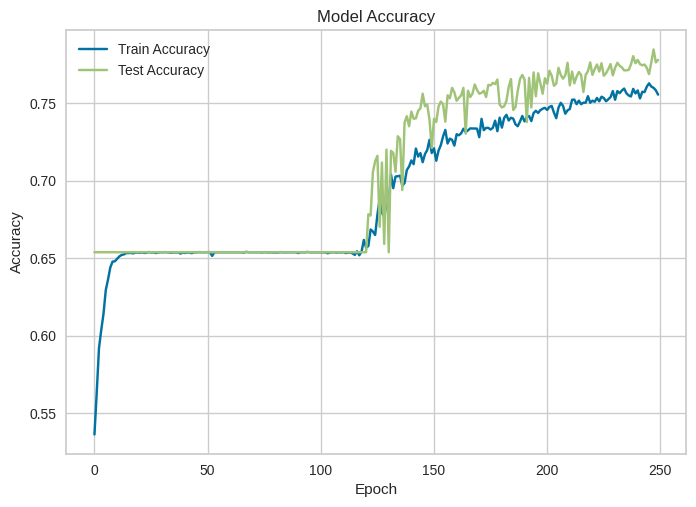

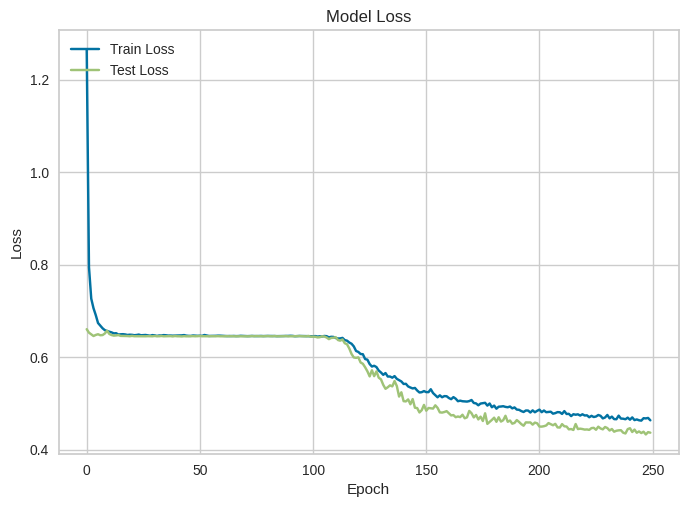

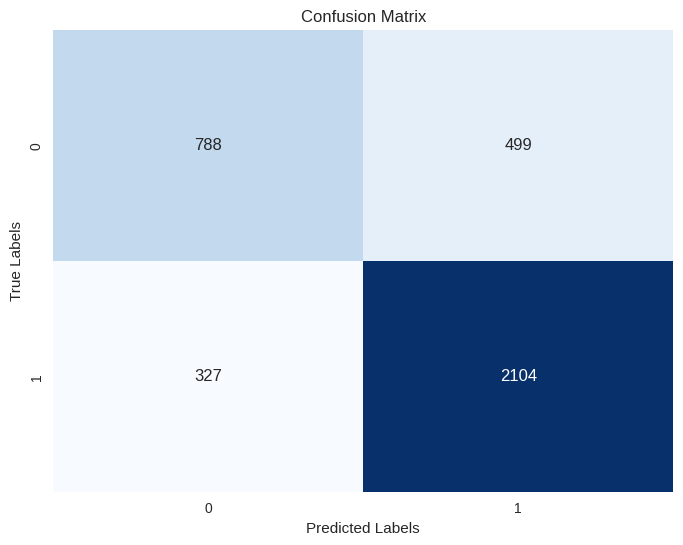

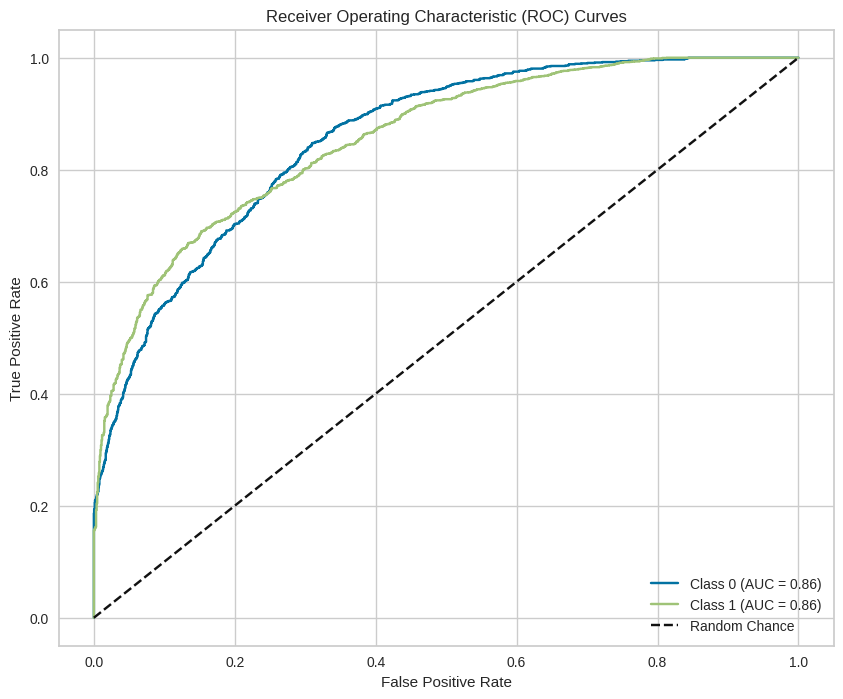

In [ ]:
evaluate_model(model, X_test, y_test, history)

## Transformer 2:2

In [ ]:
# OPTIMIZER

#Pequeños :3

LEARNING_RATE_2 = 1e-3
WEIGHT_DECAY_2 = 1e-4
LAYER_NORM_EPS_2 = 1e-6


PROJECTION_DIM_2 = 64 # No se puede modificar

#Potencias de 2

NUM_HEADS_2 = 2
NUM_LAYERS_2 = 2

MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
def transformer_2(encoded_patches):

    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)

    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1)

    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)

    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches

def Transform_sh_2(inputs):
      # Iterate over the number of layers and stack up blocks of
      # Transformer.
    for i in range(NUM_LAYERS_2):
          # Add a Transformer block.
        encoded_patches = transformer_2(inputs)

    return encoded_patches

In [ ]:
def FullyConnected():

  inputs = Input(shape=(X_train.shape[1],1), name="input_1")

  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(inputs)
  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)
  x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x=  tf.keras.layers.Dropout(rate=0.5)(x)

  x = tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)

  CVT1=Transform_sh_2(x)

  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(CVT1)
  Flat=tf.keras.layers.GlobalMaxPooling1D()(representation)


  # ANN
  x = tf.keras.layers.Dense(512, activation='selu')(Flat)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(256, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(128, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(64, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(32, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(16, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(12, activation='selu')(x)

  outputs = predictions = Dense(len(classes), activation="softmax", name="output_1")(x)
  model = Model(inputs = inputs, outputs = outputs)
  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = FullyConnected()
history = model.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/250
117/117 [==============================] - 8s 15ms/step - loss: 1.6708 - accuracy: 0.5551 - val_loss: 0.7686 - val_accuracy: 0.6538
Epoch 2/250
117/117 [==============================] - 2s 15ms/step - loss: 0.8705 - accuracy: 0.5759 - val_loss: 0.6612 - val_accuracy: 0.6538
Epoch 3/250
117/117 [==============================] - 2s 20ms/step - loss: 0.7706 - accuracy: 0.5857 - val_loss: 0.6598 - val_accuracy: 0.6538
Epoch 4/250
117/117 [==============================] - 2s 14ms/step - loss: 0.7257 - accuracy: 0.5989 - val_loss: 0.6638 - val_accuracy: 0.6538
Epoch 5/250
117/117 [==============================] - 2s 14ms/step - loss: 0.6928 - accuracy: 0.6139 - val_loss: 0.6523 - val_accuracy: 0.6538
Epoch 6/250
117/117 [==============================] - 2s 13ms/step - loss: 0.6839 - accuracy: 0.6227 - val_loss: 0.6517 - val_accuracy: 0.6538
Epoch 7/250
117/117 [==============================] - 1s 13ms/step - loss: 0.6760 - accuracy: 0.6222 - val_loss: 0.6505 - val_accuracy:

117/117 [==============================] - 1s 3ms/step
Accuracy: 0.6538461538461539
F1 Score: 0.7906976744186047
Recall: 1.0


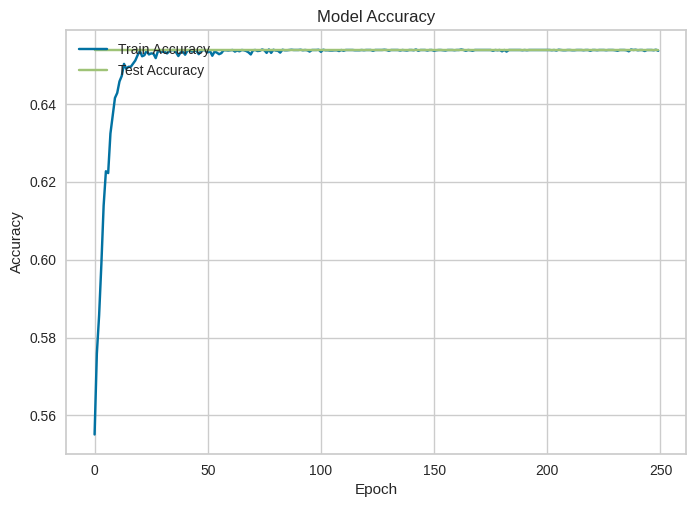

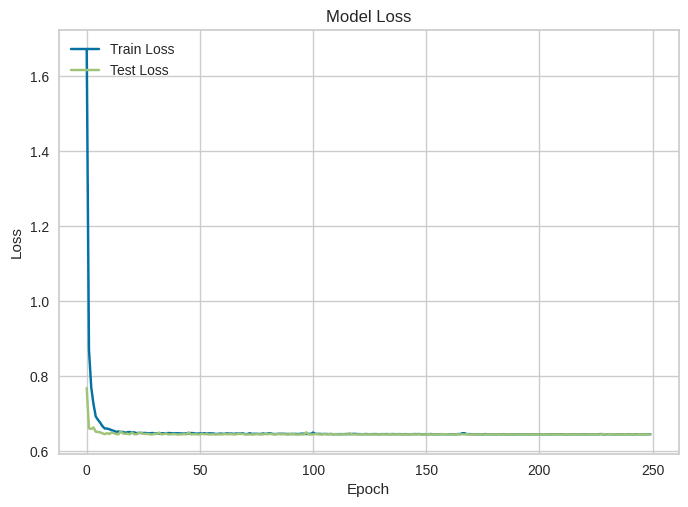

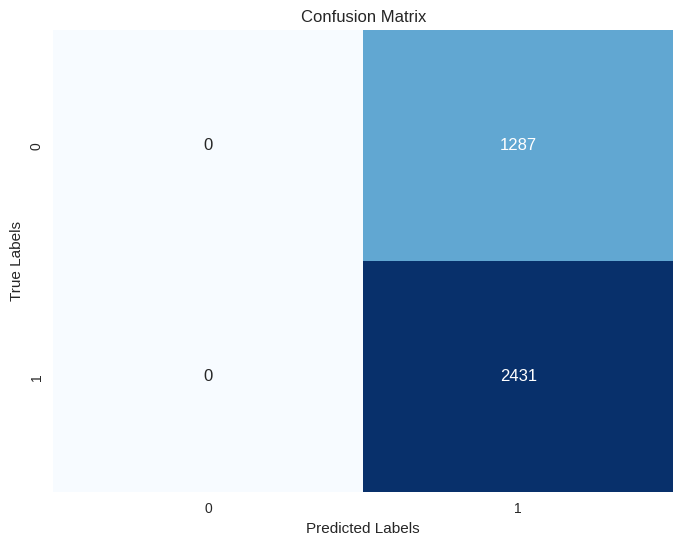

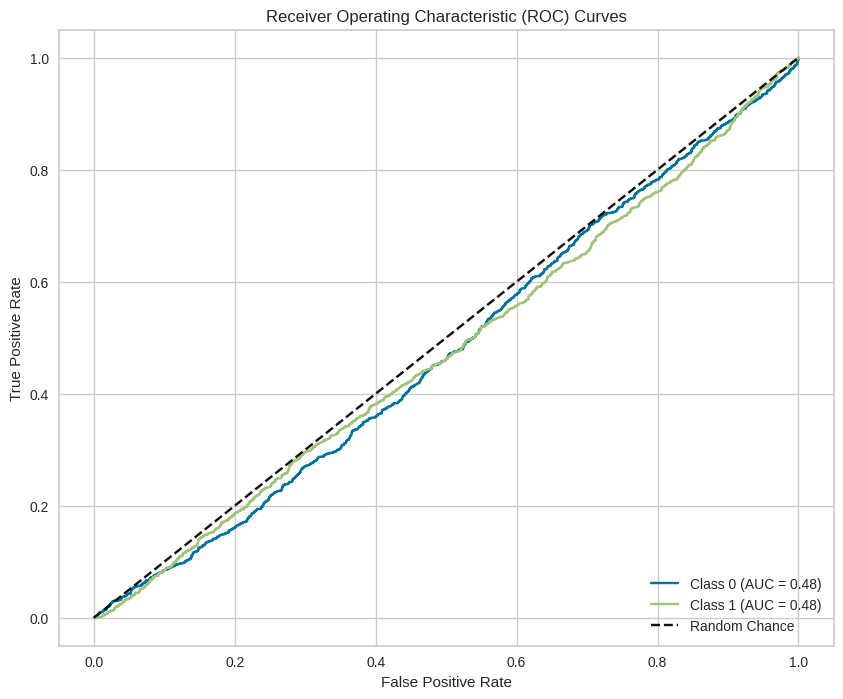

In [ ]:
evaluate_model(model, X_test, y_test, history)

##Transformer 4:4

In [ ]:
# OPTIMIZER

#Pequeños :3

LEARNING_RATE_2 = 1e-3
WEIGHT_DECAY_2 = 1e-4
LAYER_NORM_EPS_2 = 1e-6


PROJECTION_DIM_2 = 64 # No se puede modificar

#Potencias de 2

NUM_HEADS_2 = 4
NUM_LAYERS_2 = 4

MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
def transformer_2(encoded_patches):

    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)

    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1)

    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)

    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches

def Transform_sh_2(inputs):
      # Iterate over the number of layers and stack up blocks of
      # Transformer.
    for i in range(NUM_LAYERS_2):
          # Add a Transformer block.
        encoded_patches = transformer_2(inputs)

    return encoded_patches

In [ ]:
def FullyConnected():

  inputs = Input(shape=(X_train.shape[1],1), name="input_1")

  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(inputs)
  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)
  x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x=  tf.keras.layers.Dropout(rate=0.5)(x)

  x = tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)

  CVT1=Transform_sh_2(x)

  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(CVT1)
  Flat=tf.keras.layers.GlobalMaxPooling1D()(representation)


  # ANN
  x = tf.keras.layers.Dense(512, activation='selu')(Flat)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(256, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(128, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(64, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(32, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(16, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(12, activation='selu')(x)

  outputs = predictions = Dense(len(classes), activation="softmax", name="output_1")(x)
  model = Model(inputs = inputs, outputs = outputs)
  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = FullyConnected()
history = model.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/250
117/117 [==============================] - 9s 15ms/step - loss: 1.3004 - accuracy: 0.5518 - val_loss: 0.6687 - val_accuracy: 0.6538
Epoch 2/250
117/117 [==============================] - 1s 13ms/step - loss: 0.7580 - accuracy: 0.5947 - val_loss: 0.6528 - val_accuracy: 0.6538
Epoch 3/250
117/117 [==============================] - 1s 13ms/step - loss: 0.6972 - accuracy: 0.6053 - val_loss: 0.6467 - val_accuracy: 0.6538
Epoch 4/250
117/117 [==============================] - 1s 12ms/step - loss: 0.6809 - accuracy: 0.6181 - val_loss: 0.6448 - val_accuracy: 0.6538
Epoch 5/250
117/117 [==============================] - 1s 13ms/step - loss: 0.6718 - accuracy: 0.6298 - val_loss: 0.6443 - val_accuracy: 0.6538
Epoch 6/250
117/117 [==============================] - 2s 16ms/step - loss: 0.6621 - accuracy: 0.6398 - val_loss: 0.6447 - val_accuracy: 0.6538
Epoch 7/250
117/117 [==============================] - 2s 16ms/step - loss: 0.6587 - accuracy: 0.6471 - val_loss: 0.6448 - val_accuracy:

117/117 [==============================] - 1s 4ms/step
Accuracy: 0.6538461538461539
F1 Score: 0.7906976744186047
Recall: 1.0


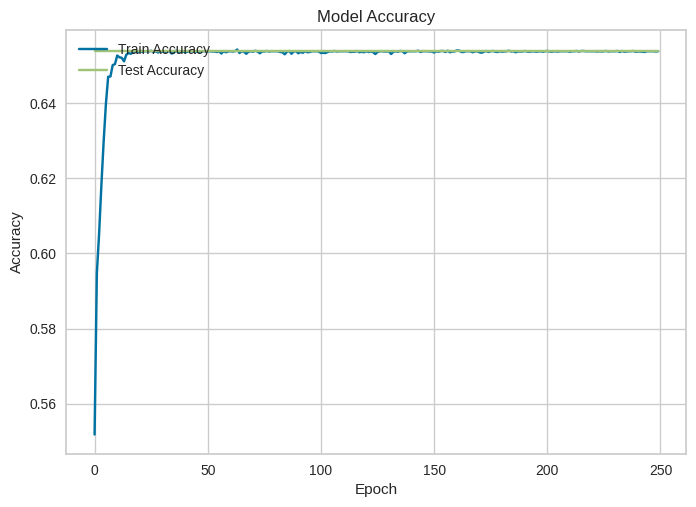

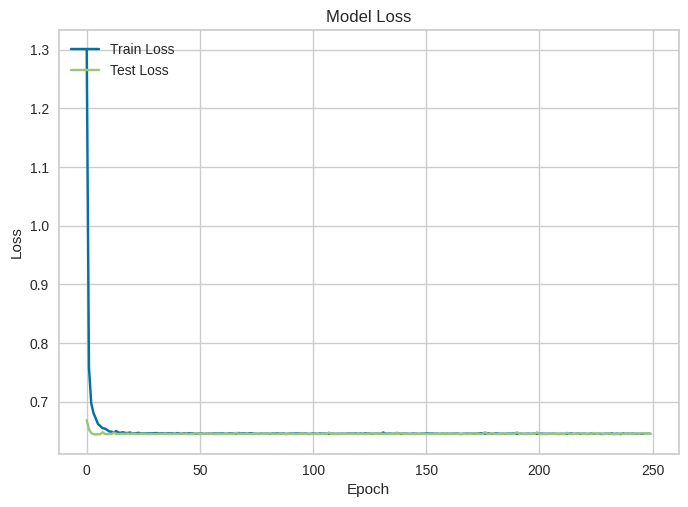

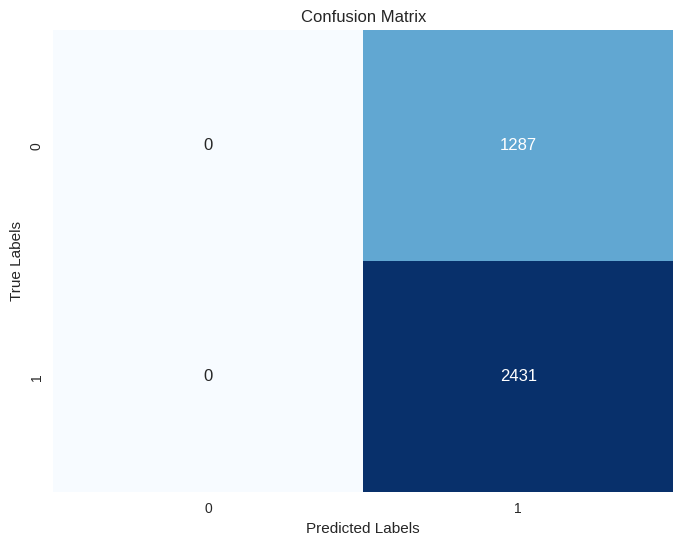

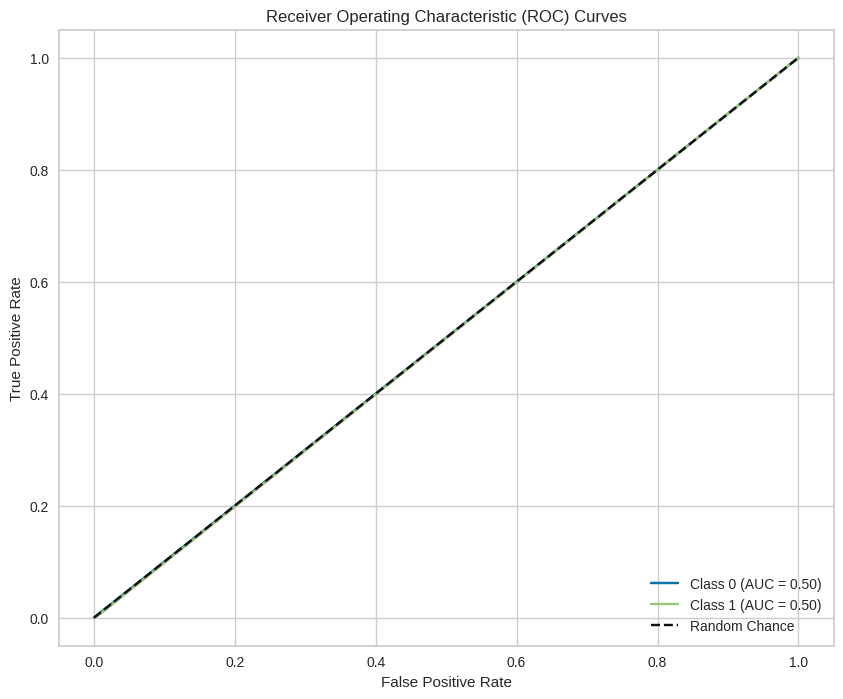

In [ ]:
evaluate_model(model, X_test, y_test, history)

##Transformer 8:8

In [ ]:
# OPTIMIZER

#Pequeños :3

LEARNING_RATE_2 = 1e-3
WEIGHT_DECAY_2 = 1e-4
LAYER_NORM_EPS_2 = 1e-6


PROJECTION_DIM_2 = 64 # No se puede modificar

#Potencias de 2

NUM_HEADS_2 = 8
NUM_LAYERS_2 = 8

MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
def transformer_2(encoded_patches):

    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)

    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1)

    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)

    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches

def Transform_sh_2(inputs):
      # Iterate over the number of layers and stack up blocks of
      # Transformer.
    for i in range(NUM_LAYERS_2):
          # Add a Transformer block.
        encoded_patches = transformer_2(inputs)

    return encoded_patches

In [ ]:
def FullyConnected():

  inputs = Input(shape=(X_train.shape[1],1), name="input_1")

  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(inputs)
  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)
  x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x=  tf.keras.layers.Dropout(rate=0.5)(x)

  x = tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)

  CVT1=Transform_sh_2(x)

  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(CVT1)
  Flat=tf.keras.layers.GlobalMaxPooling1D()(representation)


  # ANN
  x = tf.keras.layers.Dense(512, activation='selu')(Flat)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(256, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(128, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(64, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(32, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(16, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(12, activation='selu')(x)

  outputs = predictions = Dense(len(classes), activation="softmax", name="output_1")(x)
  model = Model(inputs = inputs, outputs = outputs)
  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = FullyConnected()
history = model.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/250
117/117 [==============================] - 9s 16ms/step - loss: 1.2063 - accuracy: 0.5583 - val_loss: 0.6459 - val_accuracy: 0.6538
Epoch 2/250
117/117 [==============================] - 2s 13ms/step - loss: 0.7620 - accuracy: 0.5856 - val_loss: 0.6568 - val_accuracy: 0.6538
Epoch 3/250
117/117 [==============================] - 2s 13ms/step - loss: 0.7019 - accuracy: 0.5998 - val_loss: 0.6507 - val_accuracy: 0.6538
Epoch 4/250
117/117 [==============================] - 1s 13ms/step - loss: 0.6808 - accuracy: 0.6195 - val_loss: 0.6491 - val_accuracy: 0.6538
Epoch 5/250
117/117 [==============================] - 2s 13ms/step - loss: 0.6675 - accuracy: 0.6336 - val_loss: 0.6471 - val_accuracy: 0.6538
Epoch 6/250
117/117 [==============================] - 2s 20ms/step - loss: 0.6642 - accuracy: 0.6376 - val_loss: 0.6454 - val_accuracy: 0.6538
Epoch 7/250
117/117 [==============================] - 2s 14ms/step - loss: 0.6591 - accuracy: 0.6415 - val_loss: 0.6453 - val_accuracy:

117/117 [==============================] - 1s 4ms/step
Accuracy: 0.6538461538461539
F1 Score: 0.7906976744186047
Recall: 1.0


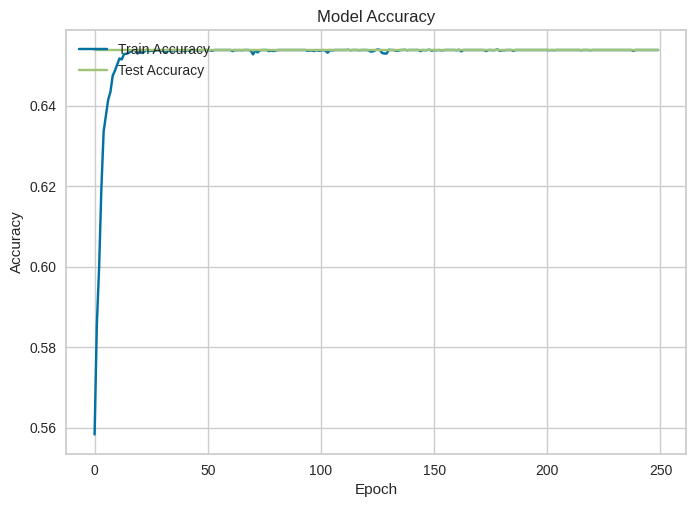

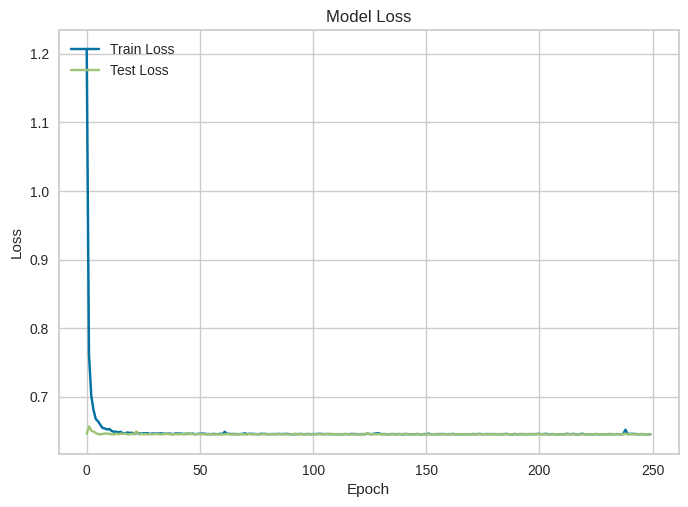

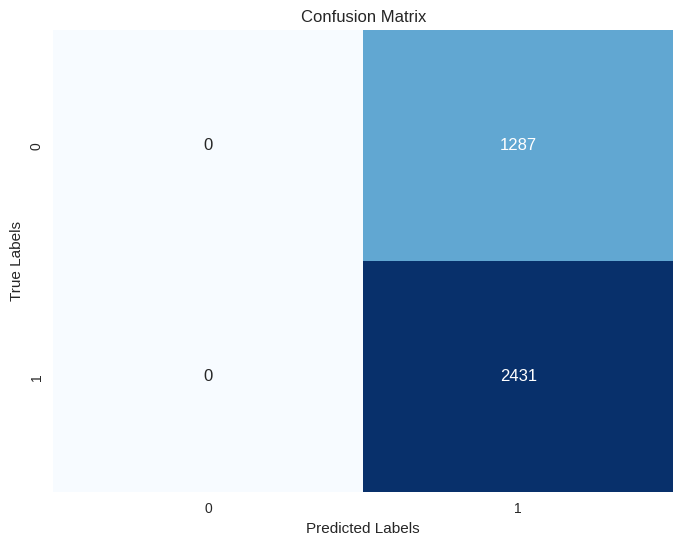

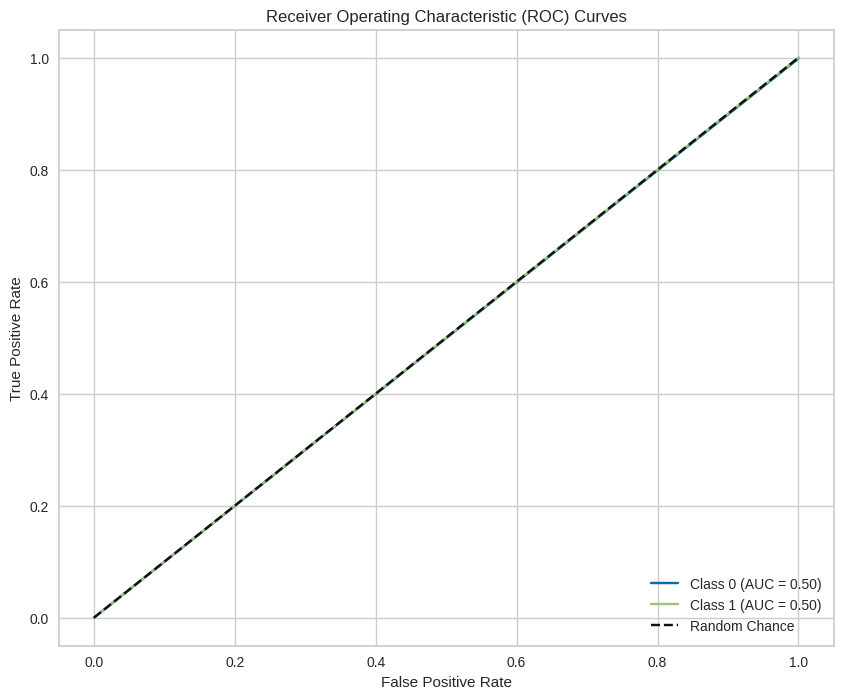

In [ ]:
evaluate_model(model, X_test, y_test, history)

##Transformer 16:16

In [ ]:
# OPTIMIZER

#Pequeños :3

LEARNING_RATE_2 = 1e-3
WEIGHT_DECAY_2 = 1e-4
LAYER_NORM_EPS_2 = 1e-6


PROJECTION_DIM_2 = 64 # No se puede modificar

#Potencias de 2

NUM_HEADS_2 = 16
NUM_LAYERS_2 = 16

MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
def transformer_2(encoded_patches):

    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)

    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1)

    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)

    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches

def Transform_sh_2(inputs):
      # Iterate over the number of layers and stack up blocks of
      # Transformer.
    for i in range(NUM_LAYERS_2):
          # Add a Transformer block.
        encoded_patches = transformer_2(inputs)

    return encoded_patches

In [ ]:
def FullyConnected():

  inputs = Input(shape=(X_train.shape[1],1), name="input_1")

  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(inputs)
  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)
  x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x=  tf.keras.layers.Dropout(rate=0.5)(x)

  x = tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)

  CVT1=Transform_sh_2(x)

  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(CVT1)
  Flat=tf.keras.layers.GlobalMaxPooling1D()(representation)


  # ANN
  x = tf.keras.layers.Dense(512, activation='selu')(Flat)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(256, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(128, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(64, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(32, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(16, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(12, activation='selu')(x)

  outputs = predictions = Dense(len(classes), activation="softmax", name="output_1")(x)
  model = Model(inputs = inputs, outputs = outputs)
  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = FullyConnected()
history = model.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/250
117/117 [==============================] - 8s 16ms/step - loss: 1.1764 - accuracy: 0.5437 - val_loss: 0.6522 - val_accuracy: 0.6533
Epoch 2/250
117/117 [==============================] - 1s 13ms/step - loss: 0.7631 - accuracy: 0.5801 - val_loss: 0.6559 - val_accuracy: 0.6538
Epoch 3/250
117/117 [==============================] - 2s 15ms/step - loss: 0.7107 - accuracy: 0.6015 - val_loss: 0.6500 - val_accuracy: 0.6538
Epoch 4/250
117/117 [==============================] - 2s 19ms/step - loss: 0.6891 - accuracy: 0.6150 - val_loss: 0.6477 - val_accuracy: 0.6538
Epoch 5/250
117/117 [==============================] - 2s 14ms/step - loss: 0.6775 - accuracy: 0.6237 - val_loss: 0.6456 - val_accuracy: 0.6538
Epoch 6/250
117/117 [==============================] - 2s 13ms/step - loss: 0.6650 - accuracy: 0.6358 - val_loss: 0.6447 - val_accuracy: 0.6538
Epoch 7/250
117/117 [==============================] - 2s 14ms/step - loss: 0.6620 - accuracy: 0.6405 - val_loss: 0.6456 - val_accuracy:

117/117 [==============================] - 1s 4ms/step
Accuracy: 0.7799892415277031
F1 Score: 0.8349475383373688
Recall: 0.851090086384204


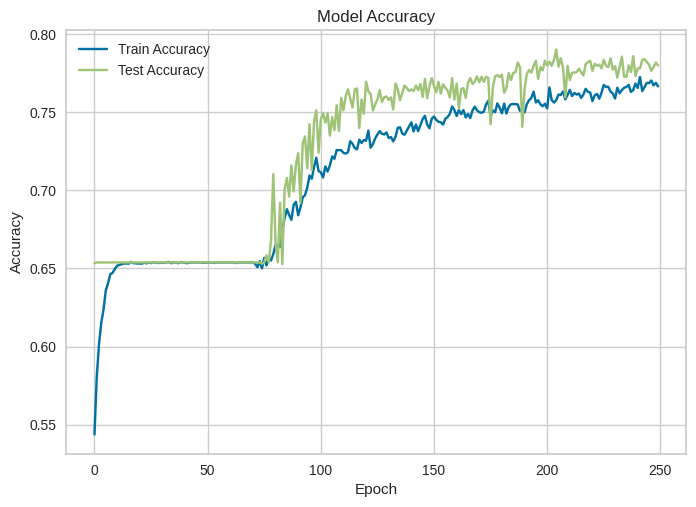

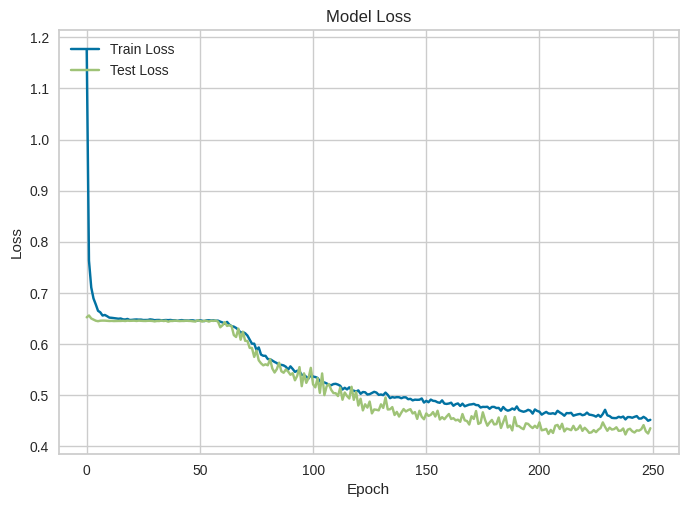

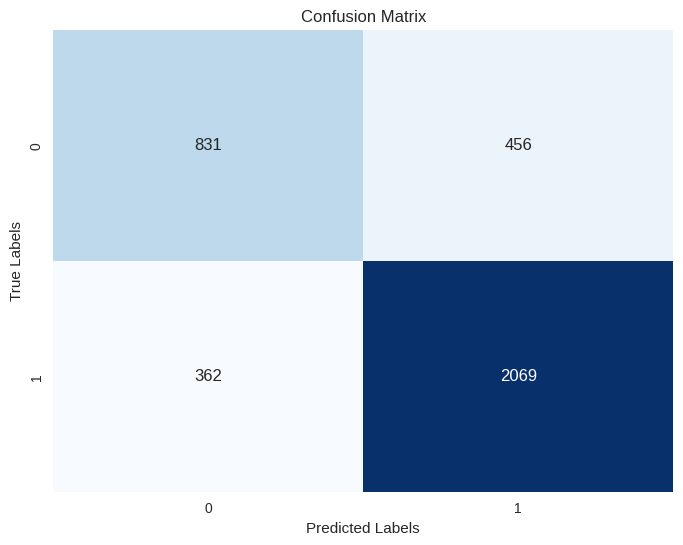

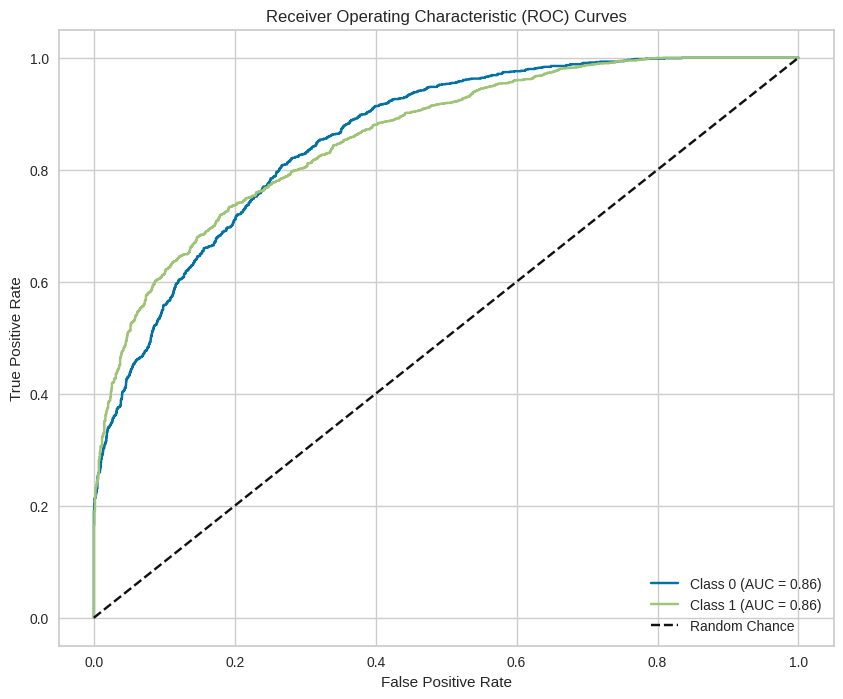

In [ ]:
evaluate_model(model, X_test, y_test, history)

In [ ]:
# OPTIMIZER

#Pequeños :3

LEARNING_RATE_2 = 1e-3
WEIGHT_DECAY_2 = 1e-4
LAYER_NORM_EPS_2 = 1e-6


PROJECTION_DIM_2 = 64 # No se puede modificar

#Potencias de 2

NUM_HEADS_2 = 16
NUM_LAYERS_2 = 1

MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
def transformer_2(encoded_patches):

    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)

    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1)

    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)

    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches

def Transform_sh_2(inputs):
      # Iterate over the number of layers and stack up blocks of
      # Transformer.
    for i in range(NUM_LAYERS_2):
          # Add a Transformer block.
        encoded_patches = transformer_2(inputs)

    return encoded_patches

In [ ]:
def FullyConnected():

  inputs = Input(shape=(X_train.shape[1],1), name="input_1")

  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(inputs)
  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)
  x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x=  tf.keras.layers.Dropout(rate=0.5)(x)

  x = tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)

  CVT1=Transform_sh_2(x)

  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(CVT1)
  Flat=tf.keras.layers.GlobalMaxPooling1D()(representation)


  # ANN
  x = tf.keras.layers.Dense(512, activation='selu')(Flat)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(256, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(128, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(64, activation='selu')(x)


  x = tf.keras.layers.Dense(32, activation='selu')(x)


  x = tf.keras.layers.Dense(16, activation='selu')(x)


  x = tf.keras.layers.Dense(12, activation='selu')(x)

  outputs = predictions = Dense(len(classes), activation="softmax", name="output_1")(x)
  model = Model(inputs = inputs, outputs = outputs)
  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = FullyConnected()
history = model.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 49s 228ms/step - accuracy: 0.5704 - loss: 0.9417 - val_accuracy: 0.6538 - val_loss: 0.6490
Epoch 2/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6482 - loss: 0.6531 - val_accuracy: 0.6538 - val_loss: 0.6377
Epoch 3/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6478 - loss: 0.6403 - val_accuracy: 0.6810 - val_loss: 0.6154
Epoch 4/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6521 - loss: 0.6215 - val_accuracy: 0.6678 - val_loss: 0.6024
Epoch 5/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6670 - loss: 0.6022 - val_accuracy: 0.6939 - val_loss: 0.5565
Epoch 6/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6763 - loss: 0.5839 - val_accuracy: 0.6902 - val_loss: 0.5465
Epoch 7/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6856 - loss: 0.5642 - val_accuracy: 0.6832 - val_loss: 0.5458
Epoch 8/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6852 - loss: 0.5674 - val_a

117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Accuracy: 0.778375470683163
F1 Score: 0.834604576475311
Recall: 0.8552036199095022


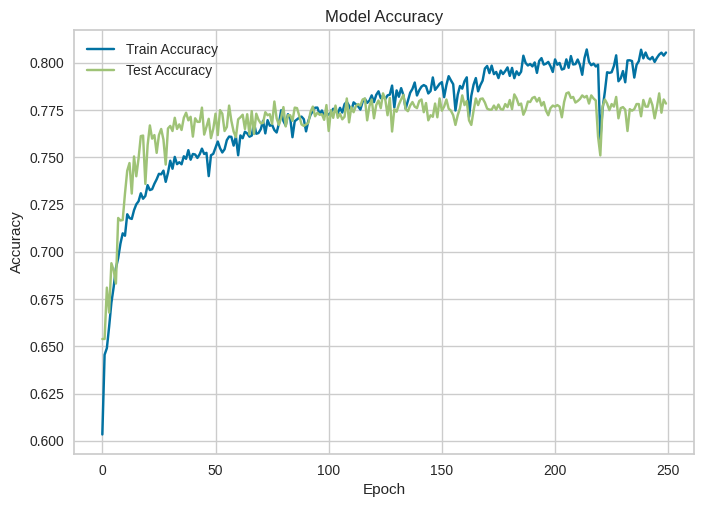

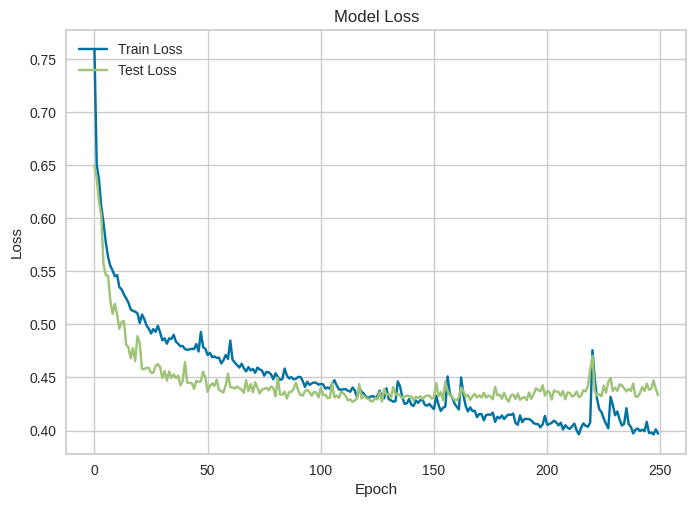

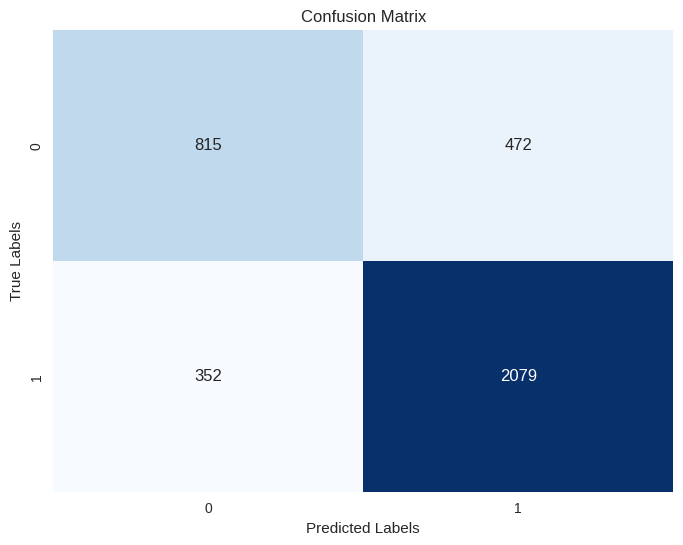

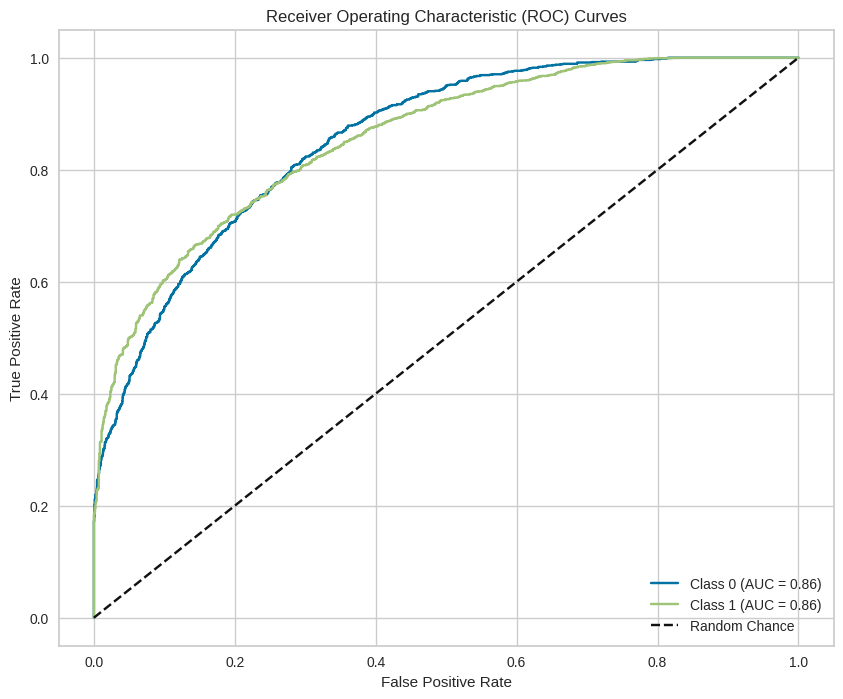

In [ ]:
evaluate_model(model, X_test, y_test, history)

## 1:1

In [ ]:
# OPTIMIZER

#Pequeños :3

LEARNING_RATE_2 = 1e-3
WEIGHT_DECAY_2 = 1e-4
LAYER_NORM_EPS_2 = 1e-6


PROJECTION_DIM_2 = 64 # No se puede modificar

#Potencias de 2

NUM_HEADS_2 = 1
NUM_LAYERS_2 = 1

MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
def transformer_2(encoded_patches):

    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)

    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1)

    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)

    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches

def Transform_sh_2(inputs):
      # Iterate over the number of layers and stack up blocks of
      # Transformer.
    for i in range(NUM_LAYERS_2):
          # Add a Transformer block.
        encoded_patches = transformer_2(inputs)

    return encoded_patches

In [ ]:
def FullyConnected():

  inputs = Input(shape=(X_train.shape[1],1), name="input_1")

  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(inputs)
  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)
  x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x=  tf.keras.layers.Dropout(rate=0.5)(x)

  x = tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)

  CVT1=Transform_sh_2(x)

  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(CVT1)
  Flat=tf.keras.layers.GlobalMaxPooling1D()(representation)


  # ANN
  x = tf.keras.layers.Dense(512, activation='selu')(Flat)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(256, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(128, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(64, activation='selu')(x)


  x = tf.keras.layers.Dense(32, activation='selu')(x)


  x = tf.keras.layers.Dense(16, activation='selu')(x)


  x = tf.keras.layers.Dense(12, activation='selu')(x)

  outputs = predictions = Dense(len(classes), activation="softmax", name="output_1")(x)
  model = Model(inputs = inputs, outputs = outputs)
  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = FullyConnected()
history = model.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 34s 176ms/step - accuracy: 0.5935 - loss: 0.7975 - val_accuracy: 0.6538 - val_loss: 0.6381
Epoch 2/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.6497 - loss: 0.6531 - val_accuracy: 0.6555 - val_loss: 0.6218
Epoch 3/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6547 - loss: 0.6311 - val_accuracy: 0.7058 - val_loss: 0.5816
Epoch 4/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6755 - loss: 0.6073 - val_accuracy: 0.6969 - val_loss: 0.5658
Epoch 5/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6744 - loss: 0.5815 - val_accuracy: 0.7012 - val_loss: 0.5571
Epoch 6/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6885 - loss: 0.5698 - val_accuracy: 0.7009 - val_loss: 0.5419
Epoch 7/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7051 - loss: 0.5546 - val_accuracy: 0.7063 - val_loss: 0.5520
Epoch 8/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6987 - loss: 0.5558 - val_

117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Accuracy: 0.7826788596019365
F1 Score: 0.834290401968827
Recall: 0.8366927190456602


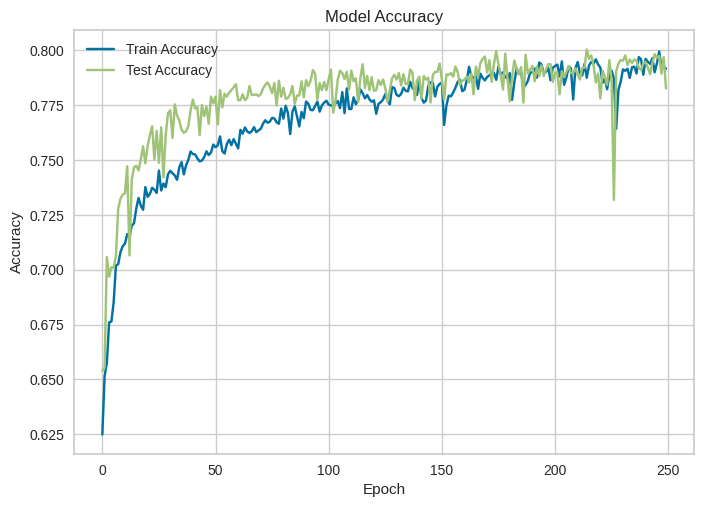

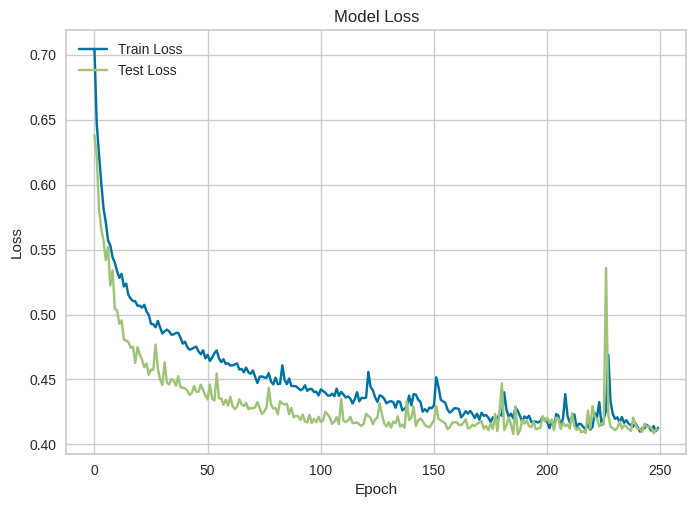

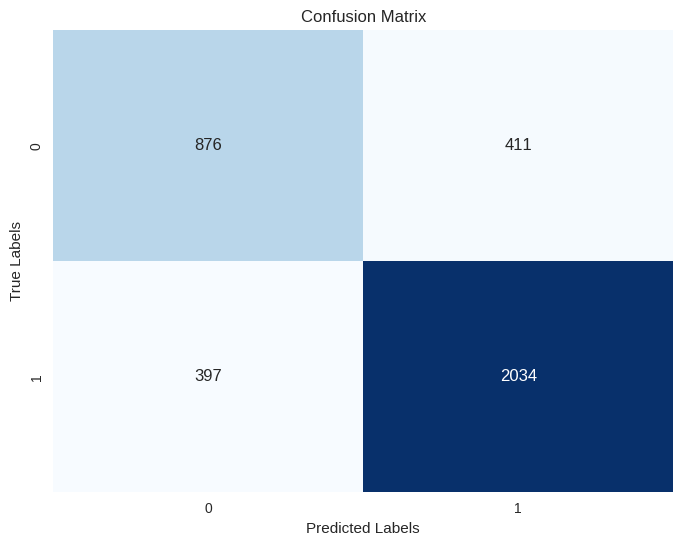

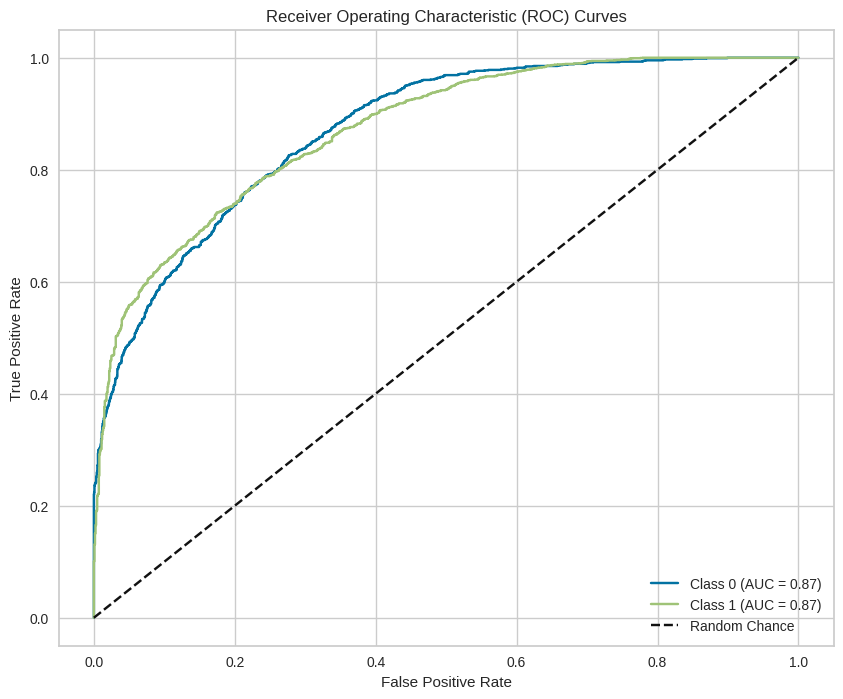

In [ ]:
evaluate_model(model, X_test, y_test, history)

In [ ]:
import numpy as np
# Matriz de confusión
confusion_matrix_values = np.array([
    [876, 411],
    [397, 2034]
])

# Calcular la matriz de confusión en porcentaje por filas
conf_matrix_percent = confusion_matrix_values.astype('float') / confusion_matrix_values.sum(axis=1)[:, np.newaxis] * 100

# Mostrar la matriz en porcentajes
print(conf_matrix_percent)

[[68.06526807 31.93473193]
 [16.3307281  83.6692719 ]]


#2:2

In [ ]:
# OPTIMIZER

#Pequeños :3

LEARNING_RATE_2 = 1e-3
WEIGHT_DECAY_2 = 1e-4
LAYER_NORM_EPS_2 = 1e-6


PROJECTION_DIM_2 = 64 # No se puede modificar

#Potencias de 2

NUM_HEADS_2 = 2
NUM_LAYERS_2 = 2

MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
def transformer_2(encoded_patches):

    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)

    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1)

    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)

    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches

def Transform_sh_2(inputs):
      # Iterate over the number of layers and stack up blocks of
      # Transformer.
    for i in range(NUM_LAYERS_2):
          # Add a Transformer block.
        encoded_patches = transformer_2(inputs)

    return encoded_patches

In [ ]:
def FullyConnected():

  inputs = Input(shape=(X_train.shape[1],1), name="input_1")

  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(inputs)
  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)
  x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x=  tf.keras.layers.Dropout(rate=0.5)(x)

  x = tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)

  CVT1=Transform_sh_2(x)

  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(CVT1)
  Flat=tf.keras.layers.GlobalMaxPooling1D()(representation)


  # ANN
  x = tf.keras.layers.Dense(512, activation='selu')(Flat)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(256, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(128, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(64, activation='selu')(x)


  x = tf.keras.layers.Dense(32, activation='selu')(x)


  x = tf.keras.layers.Dense(16, activation='selu')(x)


  x = tf.keras.layers.Dense(12, activation='selu')(x)

  outputs = predictions = Dense(len(classes), activation="softmax", name="output_1")(x)
  model = Model(inputs = inputs, outputs = outputs)
  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = FullyConnected()
history = model.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 33s 167ms/step - accuracy: 0.6169 - loss: 0.7016 - val_accuracy: 0.6547 - val_loss: 0.6398
Epoch 2/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6510 - loss: 0.6432 - val_accuracy: 0.6716 - val_loss: 0.5882
Epoch 3/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6739 - loss: 0.6004 - val_accuracy: 0.6915 - val_loss: 0.5627
Epoch 4/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6874 - loss: 0.5788 - val_accuracy: 0.7090 - val_loss: 0.5543
Epoch 5/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6826 - loss: 0.5683 - val_accuracy: 0.7084 - val_loss: 0.5437
Epoch 6/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6947 - loss: 0.5634 - val_accuracy: 0.7157 - val_loss: 0.5290
Epoch 7/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6956 - loss: 0.5631 - val_accuracy: 0.7238 - val_loss: 0.5296
Epoch 8/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7023 - loss: 0.5462 - val_a

117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Accuracy: 0.7810650887573964
F1 Score: 0.8388756927949327
Recall: 0.8716577540106952


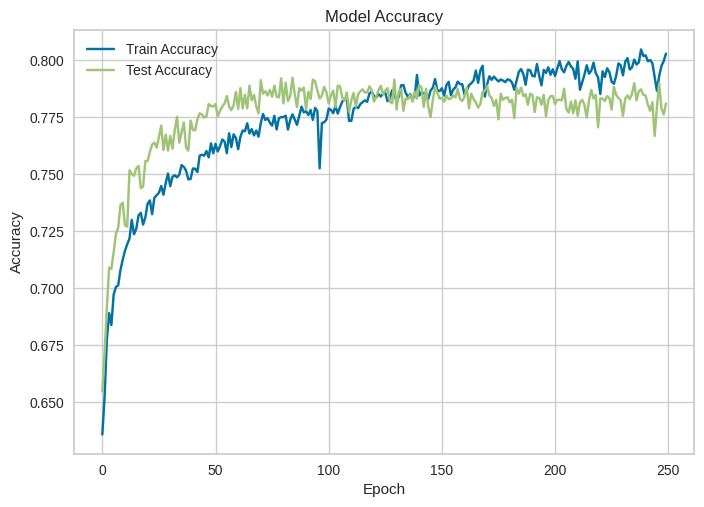

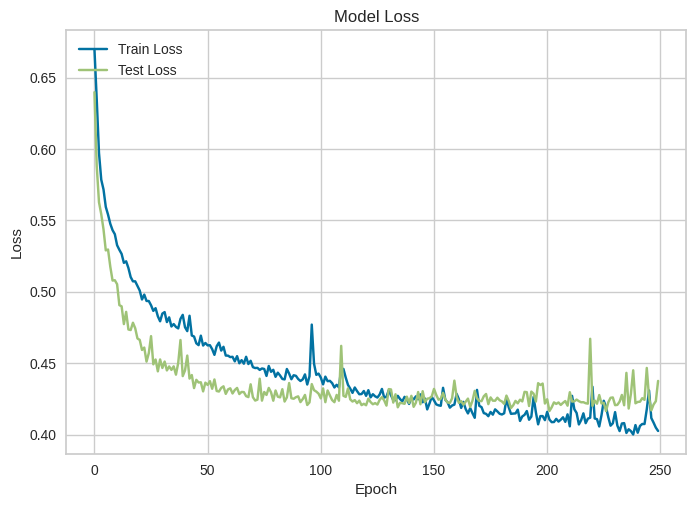

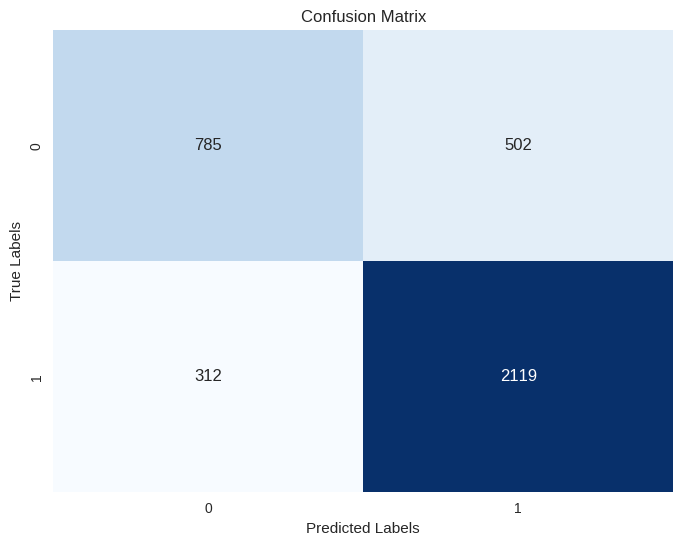

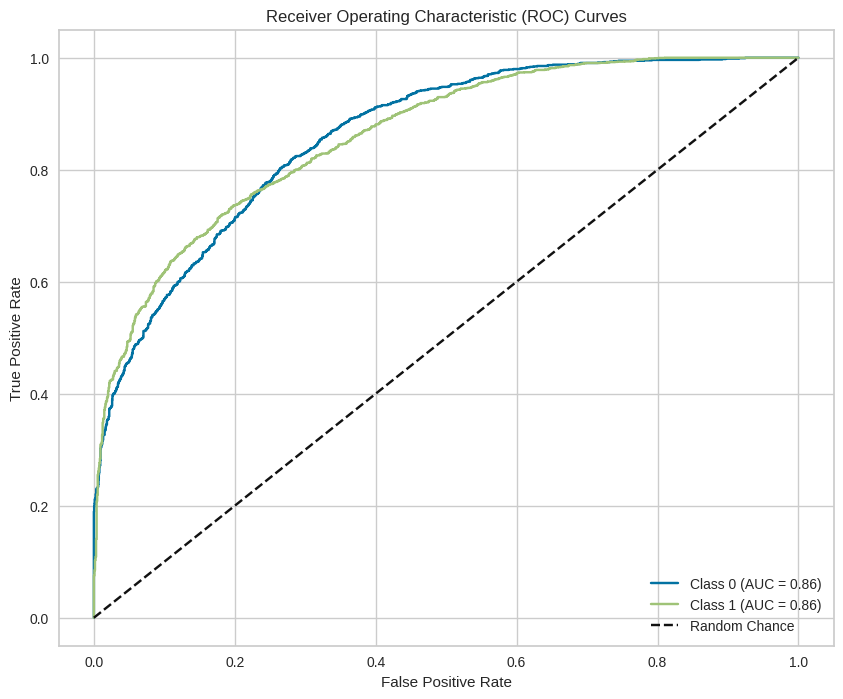

In [ ]:
evaluate_model(model, X_test, y_test, history)

## 4:4

In [ ]:
# OPTIMIZER

#Pequeños :3

LEARNING_RATE_2 = 1e-3
WEIGHT_DECAY_2 = 1e-4
LAYER_NORM_EPS_2 = 1e-6


PROJECTION_DIM_2 = 64 # No se puede modificar

#Potencias de 2

NUM_HEADS_2 = 4
NUM_LAYERS_2 = 4

MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
def transformer_2(encoded_patches):

    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)

    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1)

    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)

    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches

def Transform_sh_2(inputs):
      # Iterate over the number of layers and stack up blocks of
      # Transformer.
    for i in range(NUM_LAYERS_2):
          # Add a Transformer block.
        encoded_patches = transformer_2(inputs)

    return encoded_patches

In [ ]:
def FullyConnected():

  inputs = Input(shape=(X_train.shape[1],1), name="input_1")

  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(inputs)
  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)
  x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x=  tf.keras.layers.Dropout(rate=0.5)(x)

  x = tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)

  CVT1=Transform_sh_2(x)

  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(CVT1)
  Flat=tf.keras.layers.GlobalMaxPooling1D()(representation)


  # ANN
  x = tf.keras.layers.Dense(512, activation='selu')(Flat)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(256, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(128, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(64, activation='selu')(x)


  x = tf.keras.layers.Dense(32, activation='selu')(x)


  x = tf.keras.layers.Dense(16, activation='selu')(x)


  x = tf.keras.layers.Dense(12, activation='selu')(x)

  outputs = predictions = Dense(len(classes), activation="softmax", name="output_1")(x)
  model = Model(inputs = inputs, outputs = outputs)
  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = FullyConnected()
history = model.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 35s 179ms/step - accuracy: 0.5927 - loss: 0.7638 - val_accuracy: 0.6538 - val_loss: 0.6406
Epoch 2/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6432 - loss: 0.6463 - val_accuracy: 0.6549 - val_loss: 0.6103
Epoch 3/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6579 - loss: 0.6201 - val_accuracy: 0.7036 - val_loss: 0.5751
Epoch 4/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6821 - loss: 0.5999 - val_accuracy: 0.6961 - val_loss: 0.5726
Epoch 5/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6916 - loss: 0.5747 - val_accuracy: 0.7001 - val_loss: 0.5499
Epoch 6/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6918 - loss: 0.5746 - val_accuracy: 0.6958 - val_loss: 0.5537
Epoch 7/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6943 - loss: 0.5669 - val_accuracy: 0.7130 - val_loss: 0.5332
Epoch 8/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6972 - loss: 0.5622 - val_a

117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Accuracy: 0.7912856374394835
F1 Score: 0.8480814408770556
Recall: 0.8909913615795969


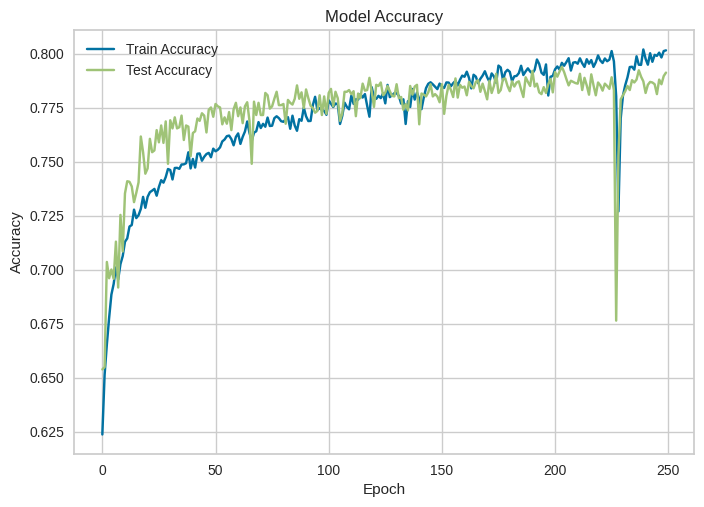

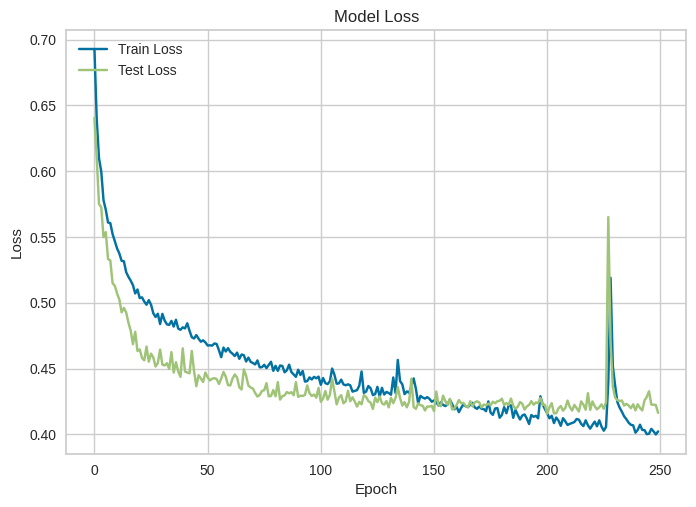

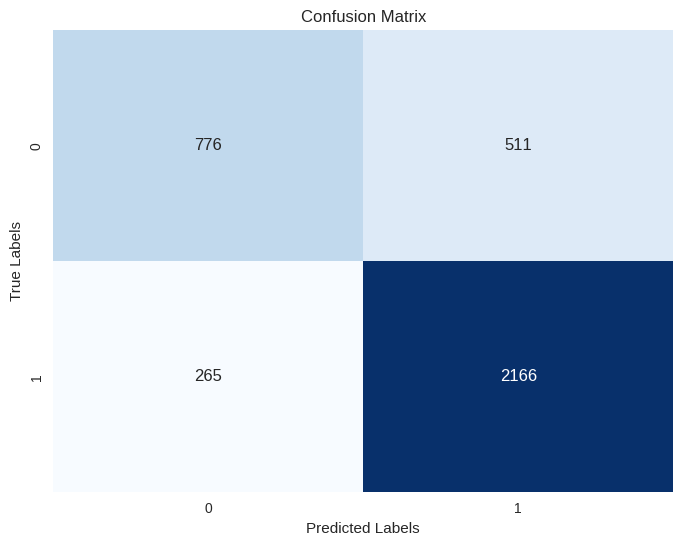

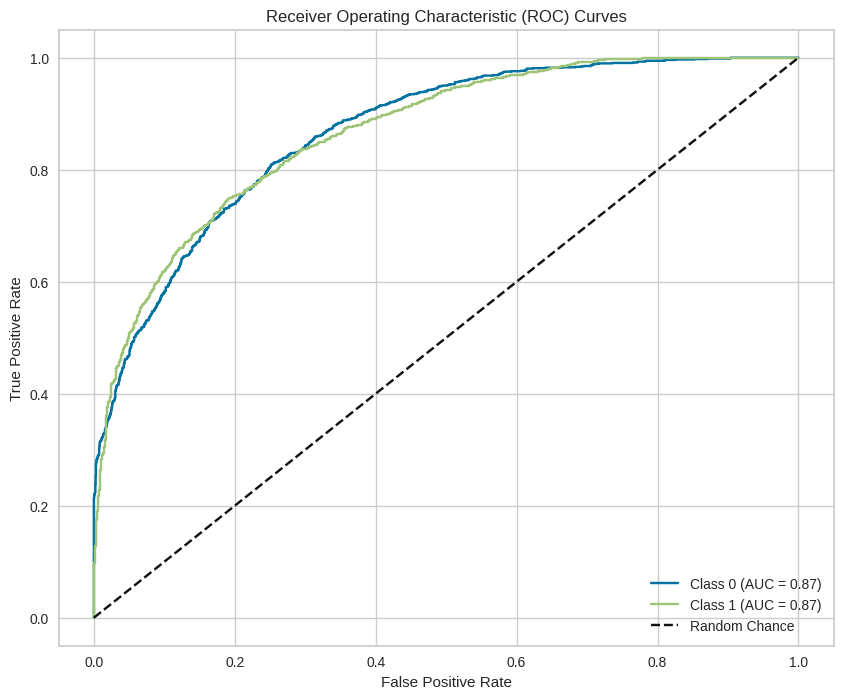

In [ ]:
evaluate_model(model, X_test, y_test, history)

##8:8

In [ ]:
# OPTIMIZER

#Pequeños :3

LEARNING_RATE_2 = 1e-3
WEIGHT_DECAY_2 = 1e-4
LAYER_NORM_EPS_2 = 1e-6


PROJECTION_DIM_2 = 64 # No se puede modificar

#Potencias de 2

NUM_HEADS_2 = 8
NUM_LAYERS_2 = 8

MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
def transformer_2(encoded_patches):

    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)

    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1)

    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)

    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches

def Transform_sh_2(inputs):
      # Iterate over the number of layers and stack up blocks of
      # Transformer.
    for i in range(NUM_LAYERS_2):
          # Add a Transformer block.
        encoded_patches = transformer_2(inputs)

    return encoded_patches

In [ ]:
def FullyConnected():

  inputs = Input(shape=(X_train.shape[1],1), name="input_1")

  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(inputs)
  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)
  x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x=  tf.keras.layers.Dropout(rate=0.5)(x)

  x = tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)

  CVT1=Transform_sh_2(x)

  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(CVT1)
  Flat=tf.keras.layers.GlobalMaxPooling1D()(representation)


  # ANN
  x = tf.keras.layers.Dense(512, activation='selu')(Flat)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(256, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(128, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(64, activation='selu')(x)


  x = tf.keras.layers.Dense(32, activation='selu')(x)


  x = tf.keras.layers.Dense(16, activation='selu')(x)


  x = tf.keras.layers.Dense(12, activation='selu')(x)

  outputs = predictions = Dense(len(classes), activation="softmax", name="output_1")(x)
  model = Model(inputs = inputs, outputs = outputs)
  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = FullyConnected()
history = model.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 35s 179ms/step - accuracy: 0.6165 - loss: 0.7238 - val_accuracy: 0.6538 - val_loss: 0.6480
Epoch 2/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6510 - loss: 0.6481 - val_accuracy: 0.6538 - val_loss: 0.6391
Epoch 3/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6562 - loss: 0.6426 - val_accuracy: 0.6538 - val_loss: 0.6329
Epoch 4/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6559 - loss: 0.6320 - val_accuracy: 0.6538 - val_loss: 0.5974
Epoch 5/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6583 - loss: 0.6126 - val_accuracy: 0.6996 - val_loss: 0.5817
Epoch 6/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6854 - loss: 0.5867 - val_accuracy: 0.6939 - val_loss: 0.5681
Epoch 7/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6810 - loss: 0.5815 - val_accuracy: 0.6961 - val_loss: 0.5499
Epoch 8/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6913 - loss: 0.5738 - val_

117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
Accuracy: 0.7807961269499731
F1 Score: 0.8337074066517037
Recall: 0.8403948992184286


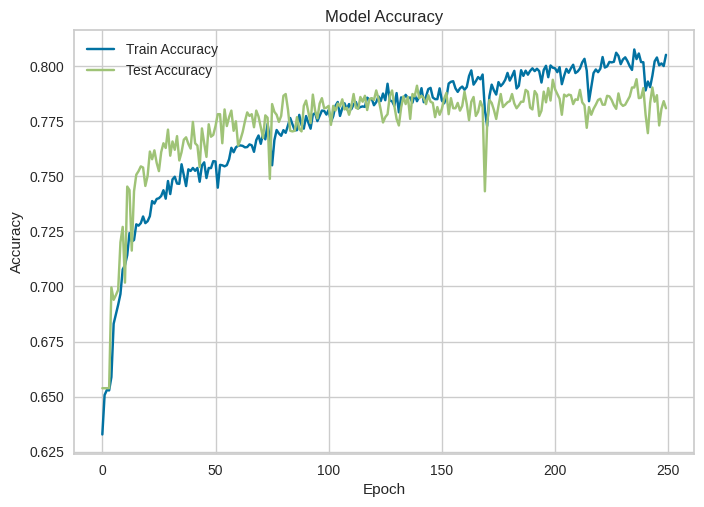

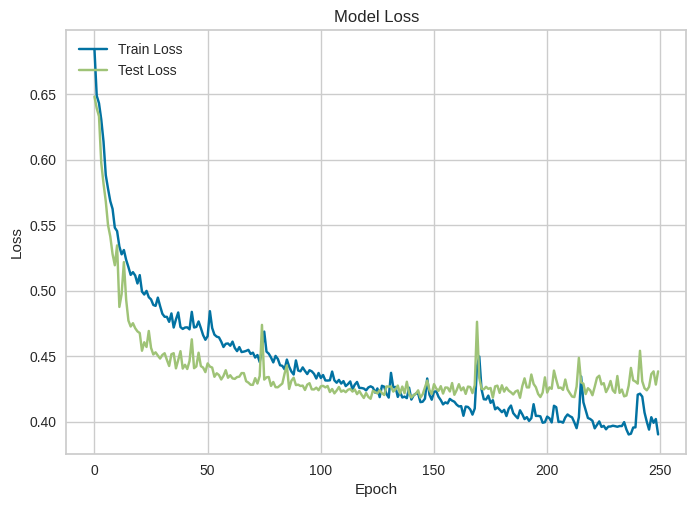

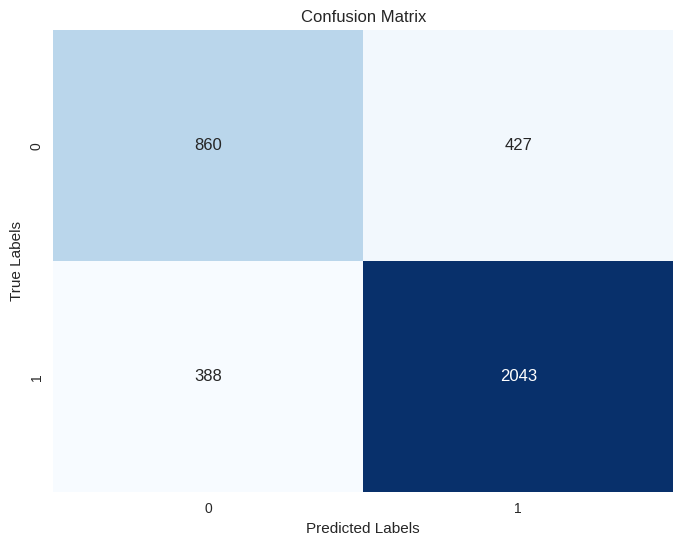

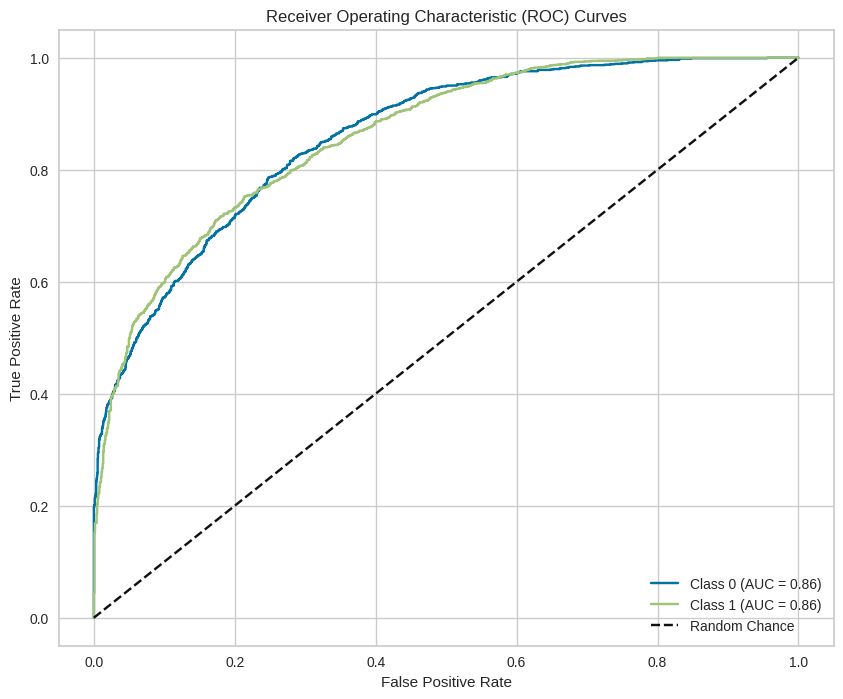

In [ ]:
evaluate_model(model, X_test, y_test, history)

##16:16

In [ ]:
# OPTIMIZER

#Pequeños :3

LEARNING_RATE_2 = 1e-3
WEIGHT_DECAY_2 = 1e-4
LAYER_NORM_EPS_2 = 1e-6


PROJECTION_DIM_2 = 64 # No se puede modificar

#Potencias de 2

NUM_HEADS_2 = 16
NUM_LAYERS_2 = 16

MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
def transformer_2(encoded_patches):

    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)

    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1)

    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)

    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches

def Transform_sh_2(inputs):
      # Iterate over the number of layers and stack up blocks of
      # Transformer.
    for i in range(NUM_LAYERS_2):
          # Add a Transformer block.
        encoded_patches = transformer_2(inputs)

    return encoded_patches

In [ ]:
def FullyConnected():

  inputs = Input(shape=(X_train.shape[1],1), name="input_1")

  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(inputs)
  x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)
  x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x=  tf.keras.layers.Dropout(rate=0.5)(x)

  x = tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('selu')(x)

  CVT1=Transform_sh_2(x)

  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(CVT1)
  Flat=tf.keras.layers.GlobalMaxPooling1D()(representation)


  # ANN
  x = tf.keras.layers.Dense(512, activation='selu')(Flat)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(256, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(128, activation='selu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(64, activation='selu')(x)


  x = tf.keras.layers.Dense(32, activation='selu')(x)


  x = tf.keras.layers.Dense(16, activation='selu')(x)


  x = tf.keras.layers.Dense(12, activation='selu')(x)

  outputs = predictions = Dense(len(classes), activation="softmax", name="output_1")(x)
  model = Model(inputs = inputs, outputs = outputs)
  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = FullyConnected()
history = model.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 53s 204ms/step - accuracy: 0.5911 - loss: 0.8327 - val_accuracy: 0.6538 - val_loss: 0.6434
Epoch 2/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6441 - loss: 0.6515 - val_accuracy: 0.6538 - val_loss: 0.6310
Epoch 3/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6469 - loss: 0.6388 - val_accuracy: 0.6638 - val_loss: 0.6050
Epoch 4/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6562 - loss: 0.6193 - val_accuracy: 0.6681 - val_loss: 0.6003
Epoch 5/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6654 - loss: 0.5992 - val_accuracy: 0.7015 - val_loss: 0.5951
Epoch 6/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6898 - loss: 0.5783 - val_accuracy: 0.7200 - val_loss: 0.5498
Epoch 7/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6895 - loss: 0.5684 - val_accuracy: 0.7200 - val_loss: 0.5492
Epoch 8/250
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7065 - loss: 0.5572 - val_a

117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Accuracy: 0.7807961269499731
F1 Score: 0.8388372552896974
Recall: 0.8724804607157548


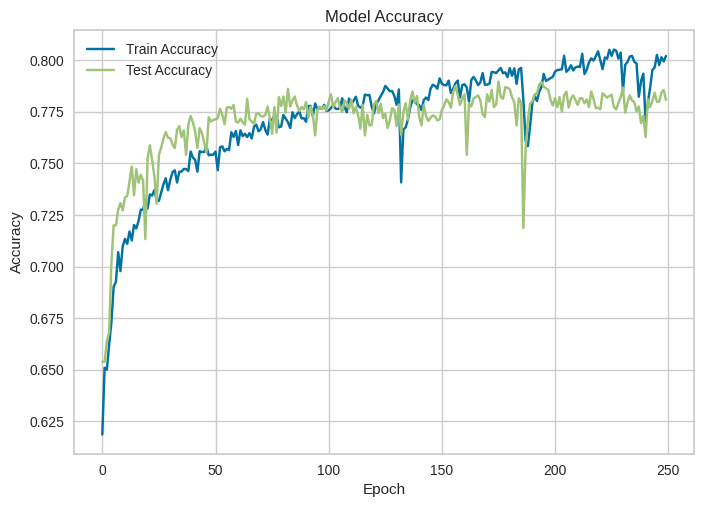

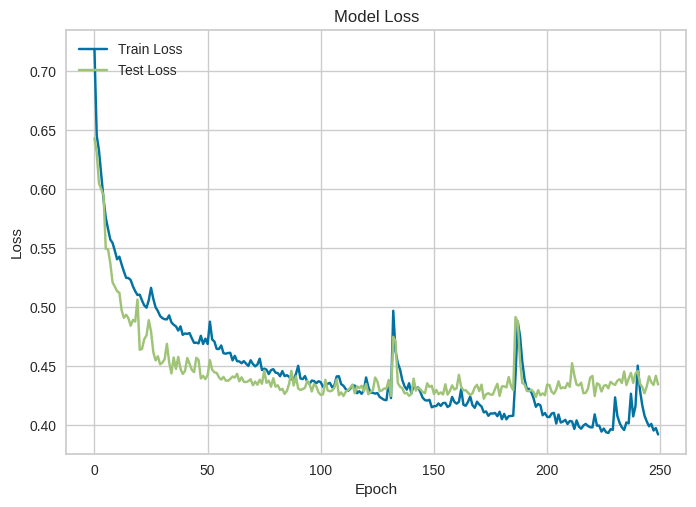

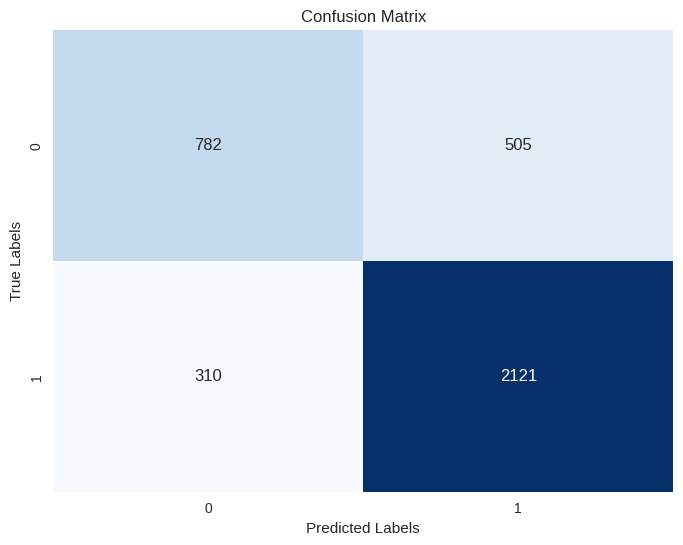

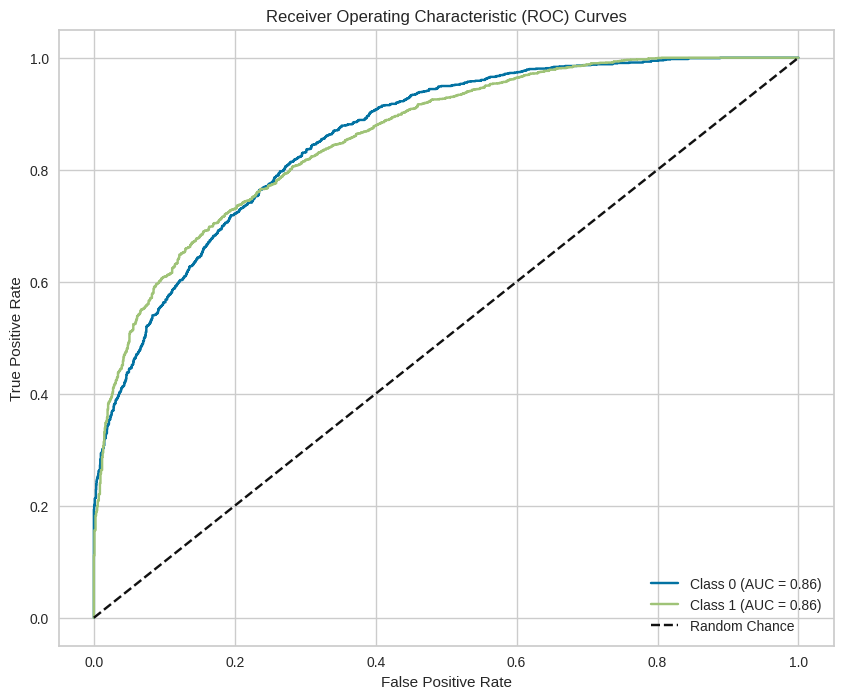

In [ ]:
evaluate_model(model, X_test, y_test, history)